<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [4]:
X_train_n.shape

(404, 13)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [20]:
model = Sequential()
model.add(Dense(6,input_dim=13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='relu'))

In [21]:
from tensorflow.keras import metrics

In [22]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['MSE'])

In [23]:
history= model.fit(X_train_n,y_train,epochs=150,validation_split=.10)

Train on 363 samples, validate on 41 samples
Epoch 1/150
363/363 [==============================] - 0s 765us/sample - loss: 591.4944 - MSE: 591.4944 - val_loss: 500.2160 - val_MSE: 500.2160
Epoch 2/150
363/363 [==============================] - 0s 40us/sample - loss: 587.8283 - MSE: 587.8282 - val_loss: 496.5183 - val_MSE: 496.5183
Epoch 3/150
363/363 [==============================] - 0s 44us/sample - loss: 583.7386 - MSE: 583.7386 - val_loss: 492.4113 - val_MSE: 492.4113
Epoch 4/150
363/363 [==============================] - 0s 45us/sample - loss: 579.2714 - MSE: 579.2714 - val_loss: 487.8642 - val_MSE: 487.8642
Epoch 5/150
363/363 [==============================] - 0s 44us/sample - loss: 574.3710 - MSE: 574.3710 - val_loss: 482.9696 - val_MSE: 482.9696
Epoch 6/150
363/363 [==============================] - 0s 45us/sample - loss: 569.0775 - MSE: 569.0775 - val_loss: 477.8040 - val_MSE: 477.8040
Epoch 7/150
363/363 [==============================] - 0s 45us/sample - loss: 563.5937 - M

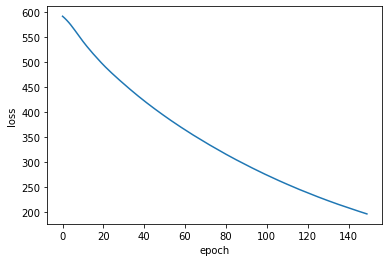

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model2=LinearRegression()
model2.fit(X_train_n,y_train)
mean_squared_error(y_test,model.predict(X_test_n))

570.7044684177515

In [36]:
data = boston_housing.load_data()


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]]), array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 

In [46]:
import pandas as pd

In [65]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(X_train_n, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002412,0.000000,0.015930,0.0,0.001053,0.012020,0.179454,0.007783,0.007828,0.600788,0.041096,0.776719,0.036634
1,0.000041,0.154587,0.003804,0.0,0.000778,0.014260,0.029418,0.011749,0.003748,0.652077,0.027545,0.740857,0.005827
2,0.006345,0.000000,0.023446,0.0,0.000817,0.006438,0.129538,0.001726,0.031089,0.862723,0.026167,0.486441,0.004223
3,0.000087,0.000000,0.011339,0.0,0.001125,0.013190,0.075376,0.013077,0.010924,0.489400,0.044133,0.867155,0.017500
4,0.004743,0.000000,0.023248,0.0,0.000916,0.008189,0.113541,0.003297,0.030826,0.855411,0.025945,0.502753,0.018816


0.000000    379
0.002194      1
0.002040      1
0.002102      1
0.001282      1
0.002371      1
0.001316      1
0.002211      1
0.001320      1
0.002282      1
0.002071      1
0.001294      1
0.002090      1
0.002203      1
0.002130      1
0.002038      1
0.001296      1
0.001861      1
0.002033      1
0.001905      1
0.001994      1
0.002019      1
0.001962      1
0.001737      1
0.001760      1
0.002066      1
Name: CHAS, dtype: int64

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [60]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist


In [67]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

In [68]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [69]:
X_train[0].shape

(28, 28)

In [70]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [71]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [72]:
# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [73]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(64, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(32, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                170       
Total params: 53,290
Trainable params: 53,290
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=False)
scores = mnist_model.evaluate(X_test, y_test)
#print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 26us/sample - loss: 0.6615 - accuracy: 0.8733


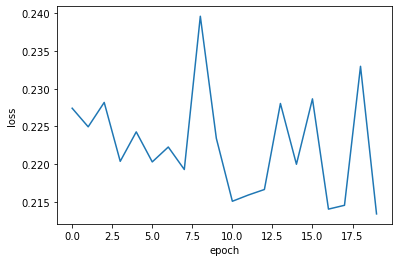

In [76]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.